Saving Customers.csv to Customers (2).csv
Saving Products.csv to Products (2).csv
Saving Transactions.csv to Transactions (2).csv
Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2

<ipython-input-3-b73264d4abf3>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2')


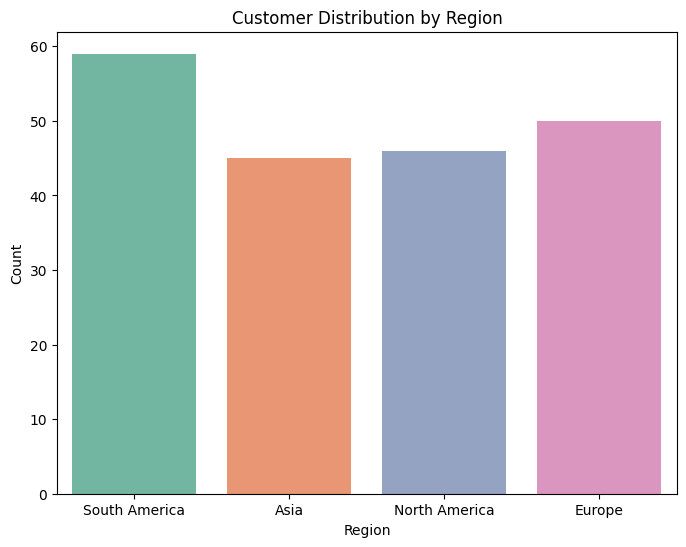

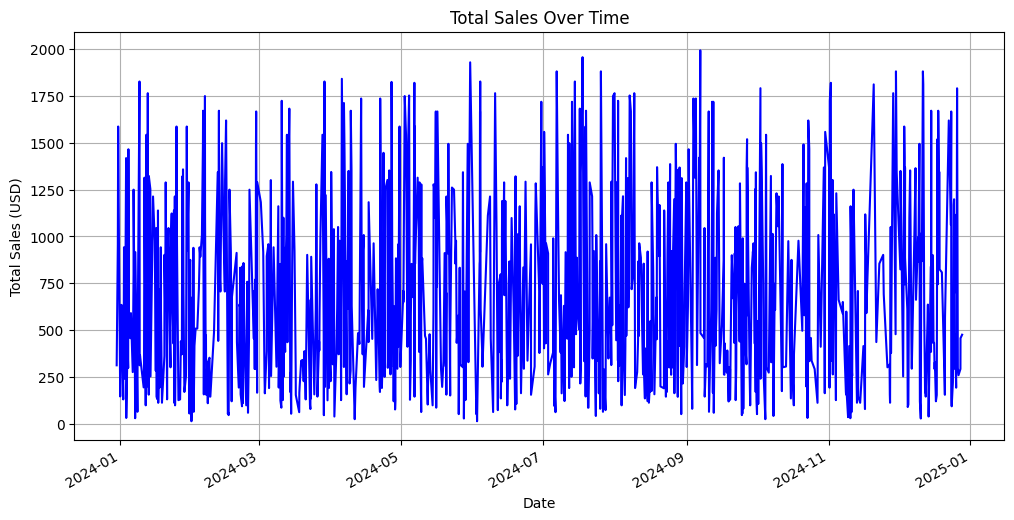

<ipython-input-3-b73264d4abf3>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=product_sales, x='Category', palette='Set3')


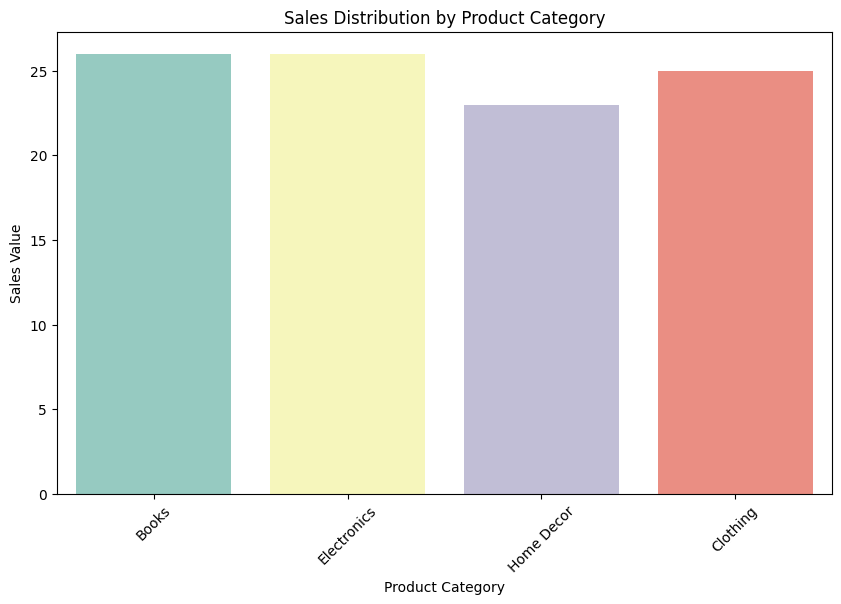

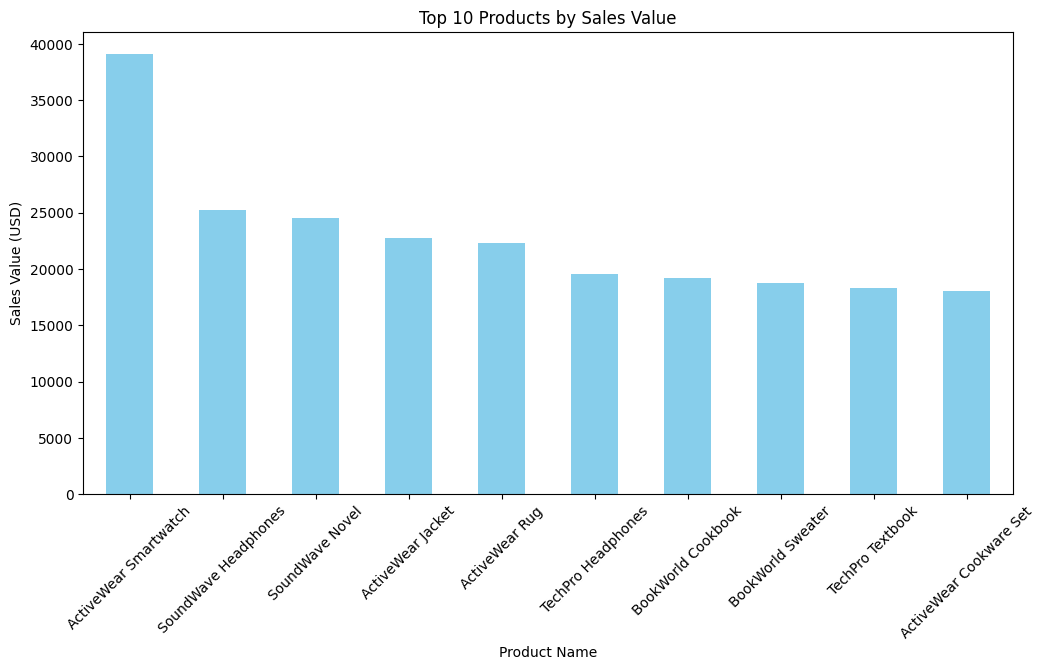

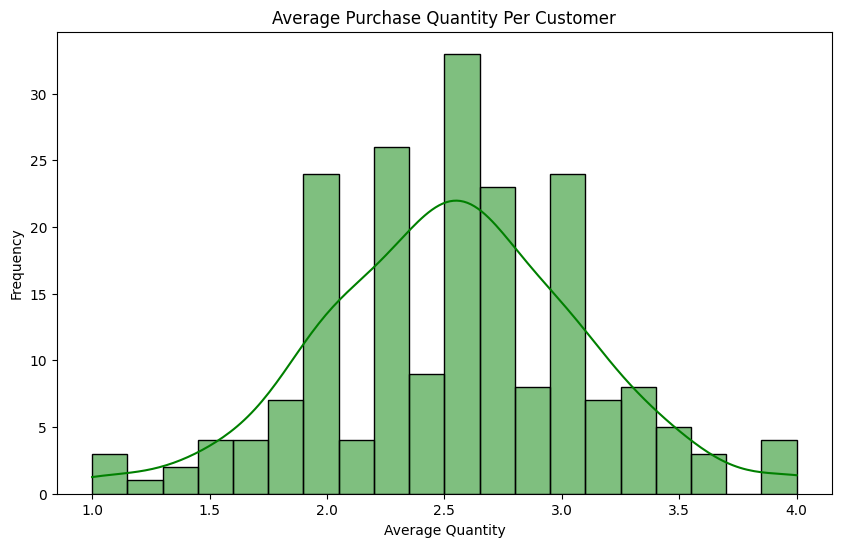

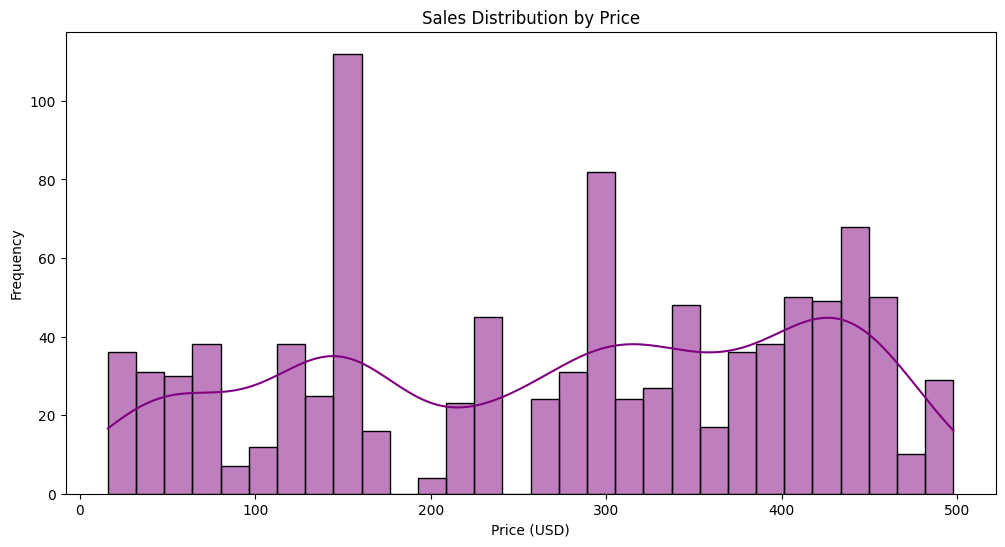

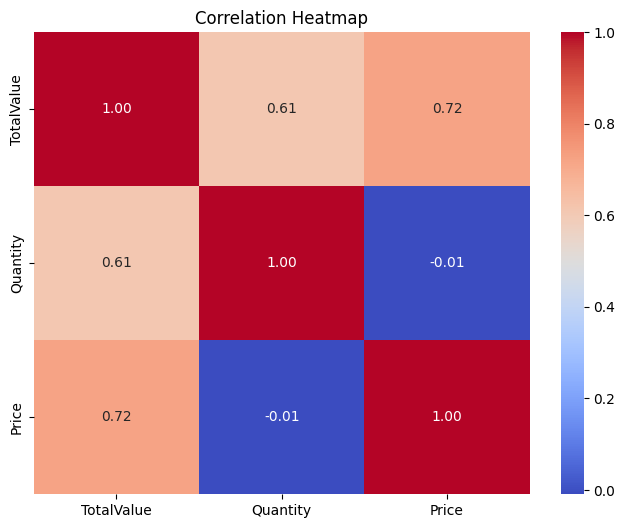

<ipython-input-3-b73264d4abf3>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x=signup_year, palette='viridis')


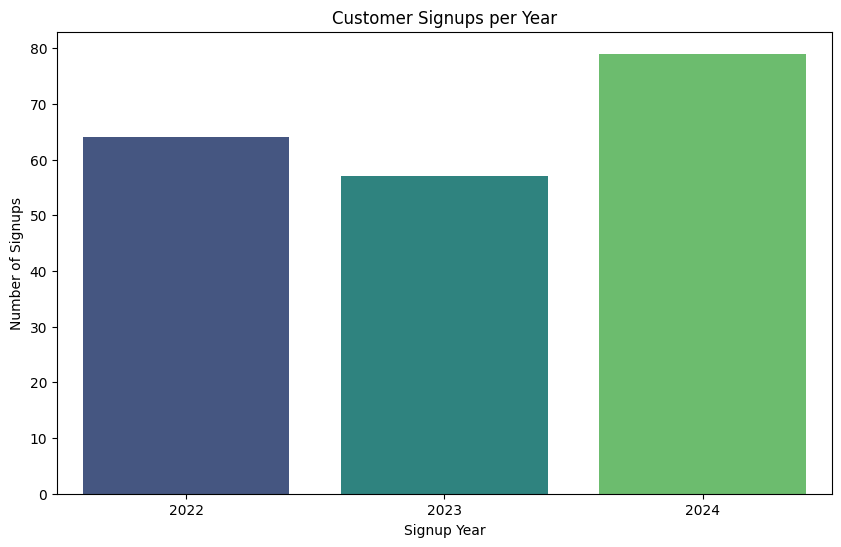

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())
print("\nMissing values in Customers Data:")
print(customers.isnull().sum())
print("\nMissing values in Products Data:")
print(products.isnull().sum())
print("\nMissing values in Transactions Data:")
print(transactions.isnull().sum())
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
print("\nSummary statistics for Customers Data:")
print(customers.describe())
print("\nSummary statistics for Products Data:")
print(products.describe())
print("\nSummary statistics for Transactions Data:")
print(transactions.describe())

plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', palette='Set2')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

sales_over_time = transactions.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.show()

category_sales = transactions.groupby('ProductID')['TotalValue'].sum()
product_sales = products.set_index('ProductID').join(category_sales, on='ProductID')
plt.figure(figsize=(10, 6))
sns.countplot(data=product_sales, x='Category', palette='Set3')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.show()

top_10_products = product_sales.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales Value')
plt.xlabel('Product Name')
plt.ylabel('Sales Value (USD)')
plt.xticks(rotation=45)
plt.show()

avg_quantity = transactions.groupby('CustomerID')['Quantity'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(avg_quantity, kde=True, color='green', bins=20)
plt.title('Average Purchase Quantity Per Customer')
plt.xlabel('Average Quantity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(transactions['Price'], kde=True, color='purple', bins=30)
plt.title('Sales Distribution by Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

corr_matrix = transactions[['TotalValue', 'Quantity', 'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

signup_year = customers['SignupDate'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x=signup_year, palette='viridis')
plt.title('Customer Signups per Year')
plt.xlabel('Signup Year')
plt.ylabel('Number of Signups')
plt.show()
